### SiPM Vb preliminar analysis

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from numpy import *
from scipy import signal
from scipy.interpolate import *

In [18]:
c_in0 = []
v_in0 = []
with open("data/corri-volt-40-60-tem0.txt", "r") as f:
    for line in f:
        c_in0.append(line.split()[3])
        v_in0.append(line.split()[2])
v0=np.asfarray(v_in0[1:-1])
c0=np.asfarray(c_in0[1:-1])


In [19]:
c_in10 = []
v_in10 = []
with open("data/corri-volt-40-60-tem10.txt", "r") as f:
    for line in f:
        c_in10.append(line.split()[3])
        v_in10.append(line.split()[2])
v10=np.asfarray(v_in10[1:-1])
c10=np.asfarray(c_in10[1:-1])

In [20]:
c_in20 = []
v_in20 = []
with open("data/corri-volt-40-60-tem20.txt", "r") as f:
    for line in f:
        c_in20.append(line.split()[3])
        v_in20.append(line.split()[2])
v20=np.asfarray(v_in20[1:-1])
c20=np.asfarray(c_in20[1:-1])

In [21]:
c_in30 = []
v_in30 = []
with open("data/corri-volt-40-60-tem30.txt", "r") as f:
    for line in f:
        c_in30.append(line.split()[3])
        v_in30.append(line.split()[2])
v30=np.asfarray(v_in30[1:-1])
c30=np.asfarray(c_in30[1:-1])

In [22]:
c_in40 = []
v_in40 = []
with open("data/corri-volt-40-60-tem40.txt", "r") as f:
    for line in f:
        c_in40.append(line.split()[3])
        v_in40.append(line.split()[2])
v40=np.asfarray(v_in40[1:-1])
c40=np.asfarray(c_in40[1:-1])

In [23]:
c_in50 = []
v_in50 = []
with open("data/corri-volt-40-60-tem50.txt", "r") as f:
    for line in f:
        c_in50.append(line.split()[3])
        v_in50.append(line.split()[2])
v50=np.asfarray(v_in50[1:-1])
c50=np.asfarray(c_in50[1:-1])

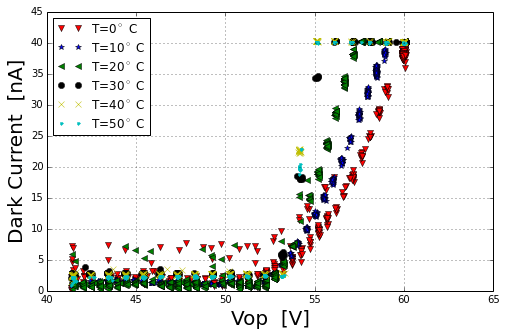

In [25]:
fig, axes = plt.subplots()
fig.set_size_inches(8,5)
axes.plot(v0,c0 , color='red', linestyle='', marker='v', markersize=6, label="T=0$^{\circ}$ C")
axes.plot(v10,c10 , color='blue', linestyle='', marker='*', markersize=6, label="T=10$^{\circ}$ C")
axes.plot(v20,c20 , color='green', linestyle='', marker='<', markersize=6, label="T=20$^{\circ}$ C")
axes.plot(v30,c30 , color='black', linestyle='', marker='o', markersize=6, label="T=30$^{\circ}$ C")
axes.plot(v40,c40 , color='y', linestyle='', marker='x', markersize=6, label="T=40$^{\circ}$ C")
axes.plot(v50,c50 , color='c', linestyle='', marker='.', markersize=6, label="T=50$^{\circ}$ C")
axes.legend(loc=2)
axes.set_xlabel("Vop  [V]", fontsize=20)
axes.set_ylabel("Dark Current  [nA]", fontsize=20)
plt.grid()
#fig.savefig("figures/breakvoltage.png")

In [26]:
#aplicando el filtro de media
c0f=sp.signal.medfilt(c0,15)
c10f=sp.signal.medfilt(c10,15)
c20f=sp.signal.medfilt(c20,15)
c30f=sp.signal.medfilt(c30,5)
c40f=sp.signal.medfilt(c40,5)
c50f=sp.signal.medfilt(c50,5)

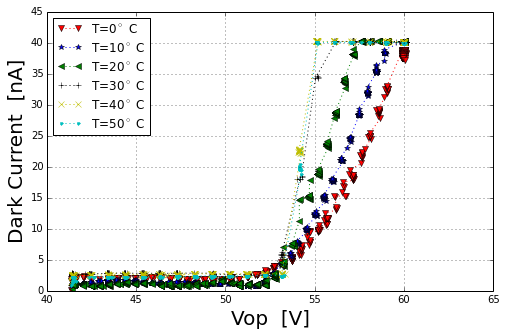

In [28]:
fig, axes = plt.subplots()
fig.set_size_inches(8,5)
axes.plot(v0,c0f , color='red', linestyle='dotted', marker='v', markersize=6, label="T=0$^{\circ}$ C")
axes.plot(v10,c10f , color='blue', linestyle='dotted', marker='*', markersize=6, label="T=10$^{\circ}$ C")
axes.plot(v20,c20f , color='green', linestyle='dotted', marker='<', markersize=6, label="T=20$^{\circ}$ C")
axes.plot(v30,c30f , color='black', linestyle='dotted', marker='+', markersize=6, label="T=30$^{\circ}$ C")
axes.plot(v40,c40f , color='y', linestyle='dotted', marker='x', markersize=6, label="T=40$^{\circ}$ C")
axes.plot(v50,c50f , color='c', linestyle='dotted', marker='.', markersize=6, label="T=50$^{\circ}$ C")
axes.legend(loc=2)
axes.set_xlabel("Vop  [V]", fontsize=20)
axes.set_ylabel("Dark Current  [nA]", fontsize=20)
plt.grid()
#fig.savefig("breakvoltage.png")

Derivada de la corriente con respecto al voltaje de operación 

$\frac{dc}{dv}=\frac{c[n+1]-c[n]}{v[n+1]-v[n]}$

In [29]:
# Reordenar las muestras 
### v0
v=v0
cf=c0f
v0_temp=[]
c0_temp=[]
v0_new=[]
c0_new=[]
for i in range(0, len(v)-1):
    dv=v[i+1]-v[i]
    if dv < 0.3:
        v0_temp.append(v[i])
        c0_temp.append(cf[i])
    elif len(v0_temp)==0:
        v0_temp.append(v[i])
        c0_temp.append(cf[i])
    else:       
        v0_new.append(np.mean(np.asarray(v0_temp)))
        c0_new.append(np.mean(np.asarray(c0_temp)))
        v0_temp=[]
        c0_temp=[]
### v10
v=v10
cf=c10f
v10_temp=[]
c10_temp=[]
v10_new=[]
c10_new=[]
for i in range(0, len(v)-1):
    dv=v[i+1]-v[i]
    if dv < 0.3:
        v10_temp.append(v[i])
        c10_temp.append(cf[i])
    elif len(v10_temp)==0:
        v10_temp.append(v[i])
        c10_temp.append(cf[i])
    else:       
        v10_new.append(np.mean(np.asarray(v10_temp)))
        c10_new.append(np.mean(np.asarray(c10_temp)))
        v10_temp=[]
        c10_temp=[]

### v20
v=v20
cf=c20f
v20_temp=[]
c20_temp=[]
v20_new=[]
c20_new=[]
for i in range(0, len(v)-1):
    dv=v[i+1]-v[i]
    if dv < 0.3:
        v20_temp.append(v[i])
        c20_temp.append(cf[i])
    elif len(v20_temp)==0:
        v20_temp.append(v[i])
        c20_temp.append(cf[i])
    else:       
        v20_new.append(np.mean(np.asarray(v20_temp)))
        c20_new.append(np.mean(np.asarray(c20_temp)))
        v20_temp=[]
        c20_temp=[]

### v30
v=v30
cf=c30f
v30_temp=[]
c30_temp=[]
v30_new=[]
c30_new=[]
for i in range(0, len(v)-1):
    dv=v[i+1]-v[i]
    if dv < 0.3:
        v30_temp.append(v[i])
        c30_temp.append(cf[i])
    elif len(v30_temp)==0:
        v30_temp.append(v[i])
        c30_temp.append(cf[i])
    else:       
        v30_new.append(np.mean(np.asarray(v30_temp)))
        c30_new.append(np.mean(np.asarray(c30_temp)))
        v30_temp=[]
        c30_temp=[]
### v40
v=v40
cf=c40f
v40_temp=[]
c40_temp=[]
v40_new=[]
c40_new=[]
for i in range(0, len(v)-1):
    dv=v[i+1]-v[i]
    if dv < 0.3:
        v40_temp.append(v[i])
        c40_temp.append(cf[i])
    elif len(v40_temp)==0:
        v40_temp.append(v[i])
        c40_temp.append(cf[i])
    else:       
        v40_new.append(np.mean(np.asarray(v40_temp)))
        c40_new.append(np.mean(np.asarray(c40_temp)))
        v40_temp=[]
        c40_temp=[]
### v50
v=v50
cf=c50f
v50_temp=[]
c50_temp=[]
v50_new=[]
c50_new=[]
for i in range(0, len(v)-1):
    dv=v[i+1]-v[i]
    if dv < 0.3:
        v50_temp.append(v[i])
        c50_temp.append(cf[i])
    elif len(v50_temp)==0:
        v50_temp.append(v[i])
        c50_temp.append(cf[i])
    else:       
        v50_new.append(np.mean(np.asarray(v50_temp)))
        c50_new.append(np.mean(np.asarray(c50_temp)))
        v50_temp=[]
        c50_temp=[]
        


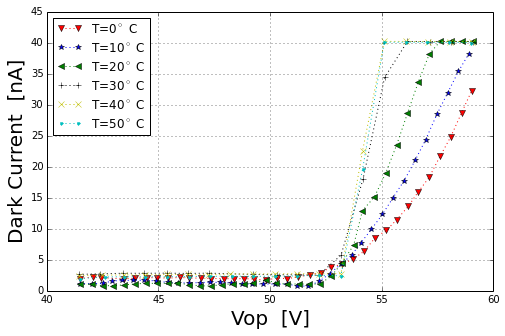

In [30]:
# nueva grafica
fig, axes = plt.subplots()
fig.set_size_inches(8,5)
axes.plot(v0_new, c0_new, color='red', linestyle='dotted', marker='v', markersize=6, label="T=0$^{\circ}$ C")
axes.plot(v10_new, c10_new, color='blue', linestyle='dotted', marker='*', markersize=6, label="T=10$^{\circ}$ C")
axes.plot(v20_new, c20_new, color='green', linestyle='dotted', marker='<', markersize=6, label="T=20$^{\circ}$ C")
axes.plot(v30_new, c30_new, color='black', linestyle='dotted', marker='+', markersize=6, label="T=30$^{\circ}$ C")
axes.plot(v40_new, c40_new, color='y', linestyle='dotted', marker='x', markersize=6, label="T=40$^{\circ}$ C")
axes.plot(v50_new, c50_new, color='c', linestyle='dotted', marker='.', markersize=6, label="T=50$^{\circ}$ C")
axes.legend(loc=2)
axes.set_xlabel("Vop  [V]", fontsize=20)
axes.set_ylabel("Dark Current  [nA]", fontsize=20)
plt.grid()

fig.savefig("figures/DC_vs_Vop.png")

In [13]:
# diferenciacion 
#dc30=[]
#dv30=[]
#dcv30=[]
#for i in range(0,len(c0_new)-1):
#    dc30.append(c0_new[i+1]-c0_new[i])
#    dv30.append(v0_new[i+1]-v0_new[i])
#    dcv30.append(dc30[i]/dv30[i])


#plt.plot(v0_new[0:-1],dcv30)

#t=np.sqrt(c0_new)
#plt.plot(v0_new,t,'r:')


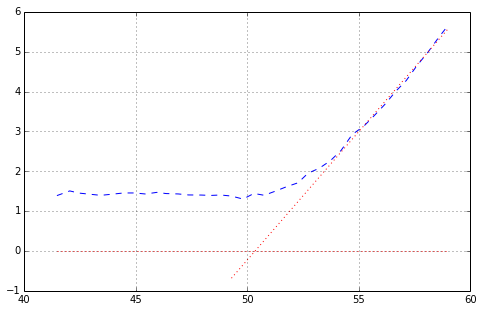

In [32]:
s0=np.sqrt(c0_new)

fig = plt.figure(figsize=(8, 5))
plt.plot(v0_new,s0,'b--')
p0 = polyfit(v0_new[25:36],s0[25:36],1)
plt.plot(v0_new[15:36],polyval(p0,v0_new[15:36]),'r:')
plt.plot(v0_new,np.zeros(len(v0_new)),'r:')
plt.grid()

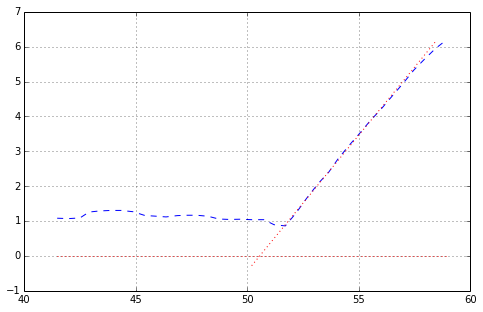

In [33]:
s10=np.sqrt(c10_new)

fig = plt.figure(figsize=(8, 5))
plt.plot(v10_new,s10,'b--')
p10 = polyfit(v10_new[21:32],s10[21:32],1)
plt.plot(v10_new[18:36],polyval(p10,v10_new[18:36]),'r:')
plt.plot(v10_new,np.zeros(len(v10_new)),'r:')
plt.grid()

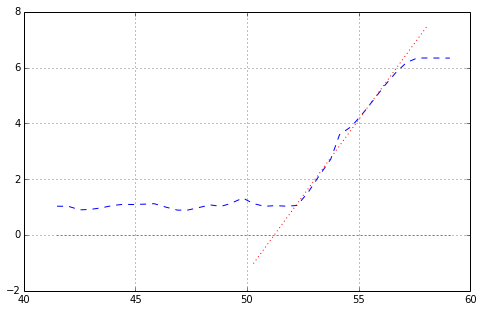

In [34]:
s20=np.sqrt(c20_new)

fig = plt.figure(figsize=(8, 5))
plt.plot(v20_new,s20,'b--')
p20 = polyfit(v20_new[22:32],s20[22:32],1)
plt.plot(v20_new[18:35],polyval(p20,v20_new[18:35]),'r:')
plt.plot(v20_new,np.zeros(len(v20_new)),'r:')
plt.grid()

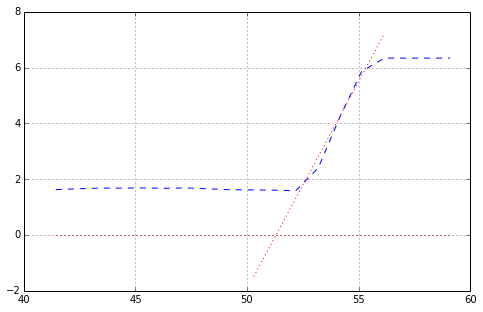

In [35]:
s30=np.sqrt(c30_new)

fig = plt.figure(figsize=(8, 5))
plt.plot(v30_new,s30,'b--')
p30 = polyfit(v30_new[10:14],s30[10:14],1)
plt.plot(v30_new[8:15],polyval(p30,v30_new[8:15]),'r:')
plt.plot(v30_new,np.zeros(len(v30_new)),'r:')
plt.grid()

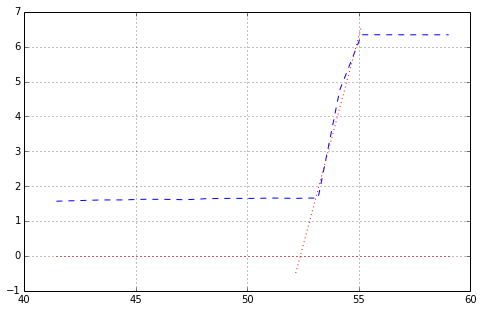

In [36]:
s40=np.sqrt(c40_new)

fig = plt.figure(figsize=(8, 5))
plt.plot(v40_new,s40,'b--')
p40 = polyfit(v40_new[12:15],s40[12:15],1)
plt.plot(v40_new[11:15],polyval(p40,v40_new[11:15]),'r:')
plt.plot(v40_new,np.zeros(len(v40_new)),'r:')
plt.grid()

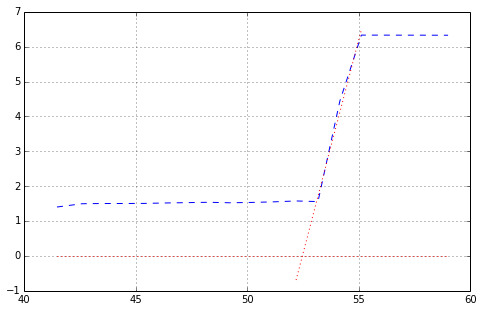

In [37]:
s50=np.sqrt(c50_new)

fig = plt.figure(figsize=(8, 5))
plt.plot(v50_new,s50,'b--')
p50 = polyfit(v50_new[12:15],s50[12:15],1)
plt.plot(v50_new[11:15],polyval(p50,v50_new[11:15]),'r:')
plt.plot(v50_new,np.zeros(len(v50_new)),'r:')
plt.grid()

In [38]:
vbr0=-p0[1]/p0[0]
vbr10=-p10[1]/p10[0]
vbr20=-p20[1]/p20[0]
vbr30=-p30[1]/p30[0]
vbr40=-p40[1]/p40[0]
vbr50=-p50[1]/p50[0]

In [39]:
T=[0,10,20,30,40,50]
Vbr=[vbr0,vbr10,vbr20,vbr30,vbr40,vbr50]
Tn=linspace(-20,70,100)
Tr = polyfit(T,Vbr,1)

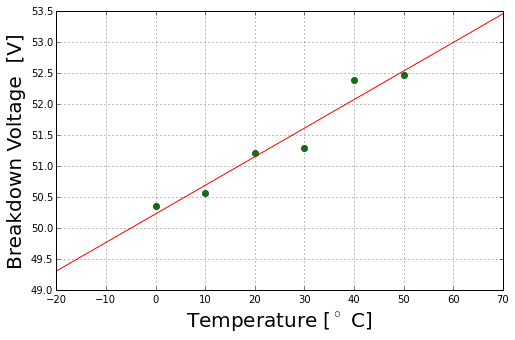

In [41]:
fig = plt.figure(figsize=(8, 5))
plt.plot(T, Vbr, linestyle=' ',color='green', marker='o')
plt.plot(Tn, polyval(Tr,Tn), color='red')
plt.ylabel("Breakdown Voltage  [V]", fontsize=20)
plt.xlabel("Temperature [$^{\circ}$ C]", fontsize=20)
plt.grid()

fig.savefig("figures/breakvoltage_vs_T.png")